# Fresh Air DC- GAM and GLM models:
    - Jordan Frengut and  Anwesha Tomar

## Importing libraries:

In [37]:
import pandas as pd 
import numpy as np 
urad= pd.read_csv("urad_csv_final.csv")
doee=pd.read_csv("doee_csv_final.csv")

## Exploring the dataset:

In [38]:
urad.count()

uRAD_id                          1040
Time_Str_Hour                    1040
AVG(Particulate_Matter_PM1)      1040
Particulate_Matter_PM25          1040
AVG(Particulate_Matter_PM10)     1040
AVG(Ozone_O3_ppm)                1040
AVG(Nitrogen_Dioxide_NO2_ppm)    1040
AVG(Sulfer_Dioxide_SO2_ppm)      1040
AVG(Carbon_Monoxide_CO_ppm)      1040
AVG(VOC_AQI)                      362
AVG(Temperature)                 1040
AVG(Pressure)                    1040
AVG(Humidity)                    1040
AVG(Noise)                       1040
dtype: int64

In [39]:
doee.count()

Value            3966
Time_Str_Hour    3966
dtype: int64

In [40]:
newurad=urad.drop(['Time_Str_Hour','Particulate_Matter_PM25','uRAD_id'], axis=1)

## Standardizing the data:

In [41]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
newurad = ss.fit_transform(newurad)


In [42]:
urad_conv = pd.DataFrame(data=newurad,columns=['Particulate_Matter_PM1','Particulate_Matter_PM10','Ozone_O3_ppm','Nitrogen_Dioxide_NO2_ppm','Sulfer_Dioxide_SO2_ppm','Carbon_Monoxide_CO_ppm','VOC_AQI','Temperature','Pressure','Humidity','Noise'])

## Concating the data:

In [43]:
date=urad['Time_Str_Hour']
pm25=urad['Particulate_Matter_PM25']
final_urad = pd.concat([date, pm25,urad_conv], axis=1)
print(final_urad.count())

Time_Str_Hour               1040
Particulate_Matter_PM25     1040
Particulate_Matter_PM1      1040
Particulate_Matter_PM10     1040
Ozone_O3_ppm                1040
Nitrogen_Dioxide_NO2_ppm    1040
Sulfer_Dioxide_SO2_ppm      1040
Carbon_Monoxide_CO_ppm      1040
VOC_AQI                      362
Temperature                 1040
Pressure                    1040
Humidity                    1040
Noise                       1040
dtype: int64


## Merging data to generate final data format:

In [44]:
final_data=pd.merge(final_urad, doee, how='inner', on='Time_Str_Hour')

In [45]:
final_data.count()

Time_Str_Hour               652
Particulate_Matter_PM25     652
Particulate_Matter_PM1      652
Particulate_Matter_PM10     652
Ozone_O3_ppm                652
Nitrogen_Dioxide_NO2_ppm    652
Sulfer_Dioxide_SO2_ppm      652
Carbon_Monoxide_CO_ppm      652
VOC_AQI                     339
Temperature                 652
Pressure                    652
Humidity                    652
Noise                       652
Value                       652
dtype: int64

## Generalized Linear Model:

In [46]:
#https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html

In [47]:
#GLM
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = sm.GLM.from_formula(formula='Value ~ Particulate_Matter_PM25 + Temperature + Pressure + Humidity' , data=final_data)
#fitting the data
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                  652
Model:                            GLM   Df Residuals:                      647
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          9.2089
Method:                          IRLS   Log-Likelihood:                -1646.4
Date:                Tue, 28 Apr 2020   Deviance:                       5958.1
Time:                        16:31:36   Pearson chi2:                 5.96e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

##### Exploring different variables of the model:

In [48]:
#Akaike Information Criterion
res.aic

3302.8265308204955

In [49]:
#Bayes Information Criterion deviance
res.bic

1765.5589414924643

In [50]:
#distribution-specific deviance functions
res.deviance

5958.147773059009

In [51]:
#The two-tailed p values for the t-stats of the params
res.pvalues

Intercept                   3.174996e-54
Particulate_Matter_PM25    2.020664e-184
Temperature                 2.413606e-15
Pressure                    2.335582e-17
Humidity                    3.369243e-02
dtype: float64

In [52]:
#Return the t-statistic for a given parameter estimate
res.tvalues

Intercept                  15.505688
Particulate_Matter_PM25    28.961329
Temperature                 7.918000
Pressure                    8.475756
Humidity                   -2.123734
dtype: float64

In [53]:
#experimental summary statistics
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                 GLM                 AIC:               3302.8265
Link Function:         identity            BIC:               1765.5589
Dependent Variable:    Value               Log-Likelihood:    -1646.4  
Date:                  2020-04-28 16:31    LL-Null:           -2209.5  
No. Observations:      652                 Deviance:          5958.1   
Df Model:              4                   Pearson chi2:      5.96e+03 
Df Residuals:          647                 Scale:             9.2089   
Method:                IRLS                                            
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                3.0589   0.1973 15.5057 0.0000  2.6723  3.4456
Particulate_Matter_PM25  0.4823   0.0167 28.9613 0.0000  0.4497  0.5150
Temperature              1.0178   0.1285  7.9180 0.0000  0.7659  1.2698
Pressure                 1.1716   0.1382  8.4758 0.0000  0.9007  1.4425
Humidity                -0.3041   0.1432 -2.1237 0.0337 -0.5847 -0.0235
=======================================================================

"""

## I believe we can manually calculate pseudo R^2 value:
https://stackoverflow.com/questions/50681946/null-deviance-statsmodels-glm-python-pseudo-r2

In [54]:
#goodness of fir
resid_deviance= res.resid_deviance
null_deviance=res.null_deviance
gof=1 - (resid_deviance/null_deviance)

In [55]:
#mean was calculated since we have get multiple values as an output
# I am unsure of this approach
np.mean(gof)

0.9999999999999994

## R^2 for GLM:

###### https://rcompanion.org/handbook/G_10.html
##### This is a small piece of text from the article that I have linked above:


###### This artcile is for R and not python:

Importantly, the summary of the glm function does not produce a p-value for the model nor an R-squared for the model. 

There is no R-squared defined for a glm model.  Instead a pseudo R-squared can be calculated.  The function nagelkerke produces pseudo R-squared values for a variety of models.  It reports three types:  McFadden, Cox and Snell, and Nagelkerke.  In general I recommend using the Nagelkerke measure, though there is no agreement on which pseudo R-squared measurement to use, if any at all.


##### Maybe the best approach would be to try this model in R.

https://github.com/statsmodels/statsmodels/issues/5861

##### A piece from a github issue:
##### I don't think for now we can calculate R^2 in python for GLM

There is no R^2 outside of linear regression, but there are many "pseudo R^2" values that people commonly use to compare GLM's. Many of these can be easily computed from the log-likelihood function, which statsmodels provides as llf. A lot of discussion about this can be found on-line, below is one good reference:

https://statisticalhorizons.com/r2logistic

In [11]:
#GLM
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = sm.GLM.from_formula(formula='Value ~ Particulate_Matter_PM25 + Temperature + Pressure + Humidity' , data=final_data, family=sm.families.Gamma())
#fitting the data
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                  652
Model:                            GLM   Df Residuals:                      647
Model Family:                   Gamma   Df Model:                            4
Link Function:          inverse_power   Scale:                         0.30213
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Tue, 28 Apr 2020   Deviance:                       1572.2
Time:                        14:59:31   Pearson chi2:                     195.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:735: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [12]:
#GLM
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = sm.GLM.from_formula(formula='Value ~ Particulate_Matter_PM25 + Temperature + Pressure + Humidity' , data=final_data, family=sm.families.Binomial())
#fitting the data
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                  652
Model:                            GLM   Df Residuals:                      647
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 28 Apr 2020   Deviance:                          nan
Time:                        14:59:32   Pearson chi2:                 1.88e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                9

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divi

In [13]:
#GLM
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = sm.GLM.from_formula(formula='Value ~ Particulate_Matter_PM25 + Temperature + Pressure + Humidity' , data=final_data, family=sm.families.Gaussian())
#fitting the data
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                  652
Model:                            GLM   Df Residuals:                      647
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          9.2089
Method:                          IRLS   Log-Likelihood:                -1646.4
Date:                Tue, 28 Apr 2020   Deviance:                       5958.1
Time:                        14:59:33   Pearson chi2:                 5.96e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [15]:
#GLM
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = sm.GLM.from_formula(formula='Value ~ Particulate_Matter_PM25 + Temperature + Pressure + Humidity' , data=final_data, family=sm.families.NegativeBinomial())
#fitting the data
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                  652
Model:                            GLM   Df Residuals:                      647
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1911.9
Date:                Tue, 28 Apr 2020   Deviance:                       165.54
Time:                        14:59:35   Pearson chi2:                     128.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [16]:
#GLM
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = sm.GLM.from_formula(formula='Value ~ Particulate_Matter_PM25 + Temperature + Pressure + Humidity' , data=final_data, family=sm.families.Poisson())
#fitting the data
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                  652
Model:                            GLM   Df Residuals:                      647
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.1
Date:                Tue, 28 Apr 2020   Deviance:                       925.66
Time:                        14:59:37   Pearson chi2:                     880.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Generalized Additive Model:

### Fitting data without spline penalties:

In [56]:
#GAM
from pygam import LinearGAM,s,f,l
X=final_data[['Particulate_Matter_PM25','Temperature', 'Pressure' , 'Humidity']]
y=pd.Series(final_data['Value'])
#fitting the data
gammodel1 = LinearGAM(s(0) + s(1)+s(2)+s(3)).fit(X, y)
gammodel1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     46.9654
Link Function:                     IdentityLink Log Likelihood:                                 -1994.1206
Number of Samples:                          652 AIC:                                             4084.1721
                                                AICc:                                            4091.9616
                                                GCV:                                                9.2027
                                                Scale:                                              8.0178
                                                Pseudo R-Squared:                                   0.7029
Feature Function                  Lam

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  import sys


### Plotting partial dependence:

<Figure size 432x288 with 0 Axes>

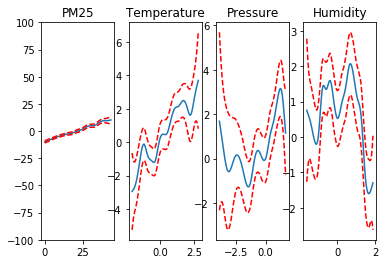

In [57]:
import matplotlib.pyplot as plt
plt.figure();
fig, axs = plt.subplots(1,4);

titles = ['PM25','Temperature', 'Pressure', 'Humidity']
for i, ax in enumerate(axs):
    XX = gammodel1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gammodel1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gammodel1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-100,100)
    ax.set_title(titles[i]);

### Using Grid Search CV to find the accurate GCV for the analysis:

In [58]:
#GAM
from pygam import LinearGAM,s,f,l
X=final_data[['Particulate_Matter_PM25','Temperature', 'Pressure' , 'Humidity']]
y=pd.Series(final_data['Value'])
gammodel1 = LinearGAM(s(0) + s(1)+s(2)+s(3)).fit(X, y)
gammodel1.gridsearch(X, y)
gammodel1.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.0671
Link Function:                     IdentityLink Log Likelihood:                                 -2011.7534
Number of Samples:                          652 AIC:                                              4063.641
                                                AICc:                                            4064.9811
                                                GCV:                                                8.6842
                                                Scale:                                              8.2283
                                                Pseudo R-Squared:                                   0.6811
Feature Function                  Lam

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  import sys


### Locating the maximum value for GCV:

In [59]:
from pygam import LinearGAM,s,f,l
X=final_data[['Particulate_Matter_PM25','Temperature', 'Pressure' , 'Humidity']]
y=pd.Series(final_data['Value'])
gamcv = LinearGAM(n_splines=200).fit(X, y)
gamcv.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    220.8341
Link Function:                     IdentityLink Log Likelihood:                                 -2165.1586
Number of Samples:                          652 AIC:                                             4773.9856
                                                AICc:                                            5004.3497
                                                GCV:                                               25.6113
                                                Scale:                                             10.7079
                                                Pseudo R-Squared:                                   0.7173
Feature Function                  Lam

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """


### The final model with GCV=25:

In [60]:
from pygam import LinearGAM,s,f,l
X=final_data[['Particulate_Matter_PM25','Temperature', 'Pressure' , 'Humidity']]
y=pd.Series(final_data['Value'])
gamcv2 = LinearGAM(n_splines=25).fit(X, y)
gamcv2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     57.7828
Link Function:                     IdentityLink Log Likelihood:                                 -1990.4586
Number of Samples:                          652 AIC:                                              4098.483
                                                AICc:                                            4110.3509
                                                GCV:                                                9.4778
                                                Scale:                                              7.9789
                                                Pseudo R-Squared:                                   0.7096
Feature Function                  Lam

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """


### Final dependence model:

<Figure size 432x288 with 0 Axes>

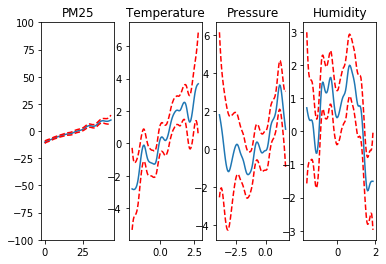

In [61]:
import matplotlib.pyplot as plt
plt.figure();
fig, axs = plt.subplots(1,4);

titles = ['PM25','Temperature', 'Pressure', 'Humidity']
for i, ax in enumerate(axs):
    XX = gammodel1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gamcv2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gamcv2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-100,100)
    ax.set_title(titles[i]);

## Predict Function for GAM:

In [62]:
#gam predict 
x_test=final_data[['Particulate_Matter_PM25','Temperature','Pressure','Humidity']]
predvalues=gamcv2.predict(x_test)

In [63]:
predvalues

array([ 1.51937926,  5.46534563,  4.30031577,  4.28239761,  2.51832587,
        1.11177895,  1.1171754 ,  1.20719746,  1.25896348,  1.34671833,
        1.92374125,  2.89930239,  3.11416737,  3.06017059,  3.04945636,
        2.35877293,  2.4044663 ,  2.30578516,  2.11258799,  2.40654392,
        2.78685317,  3.36191984,  3.27491552,  2.96034237,  2.87537141,
        3.70961186,  2.69100216,  3.61499162,  4.05406454,  4.07001837,
        4.02368399,  3.92824095,  3.35224847,  5.2960408 ,  5.54296737,
        5.35695534,  5.10397351,  5.66891639,  5.34603642,  7.35338547,
        7.37564973,  5.84752686,  6.02559873,  5.63530428,  6.29581149,
        5.78639885,  8.0705142 ,  8.95776217,  7.99384381,  4.10416363,
        3.91810435,  3.95155664,  5.34365817,  5.62986515,  5.52465039,
        5.56317999,  6.72567467,  6.75634028,  7.70334448,  7.83018751,
        8.31398567,  8.81164812,  9.07378478, 10.18763597,  9.47766147,
       10.15435708,  9.84894794,  9.60710506,  7.12448837,  6.39

## Plotting OBS vs PRED for GAM:

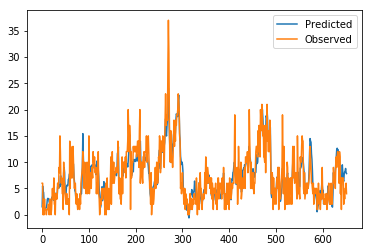

In [64]:
import matplotlib.pyplot as plt
plt.plot(predvalues,label='Predicted')
plt.plot(final_data['Value'],label='Observed')
plt.legend()
plt.show()

## Plotting OBS vs PRED for GLM:

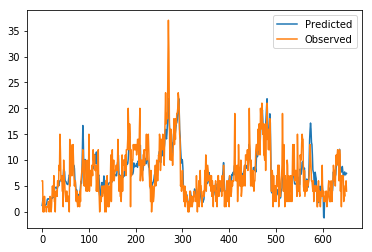

In [65]:
#https://docs.pymc.io/notebooks/GLM-robust.html
predictions = res.predict()
plt.plot(predictions,label='Predicted')
plt.plot(final_data['Value'],label='Observed')
plt.legend()
plt.show()

## Plotting OBS vs PRED for GAM:

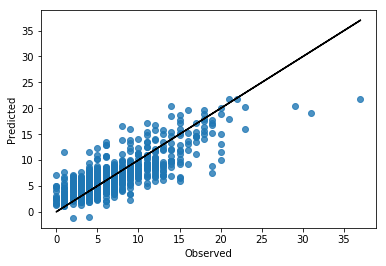

In [66]:
#https://docs.pymc.io/notebooks/GLM-robust.html
X_columns= ['Value']
X = final_data[X_columns]
predictions = res.predict()
plt.scatter( final_data['Value'],predictions, alpha=0.8)
plt.plot(X,X,'k-')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

## Plotting OBS vs PRED for GLM:

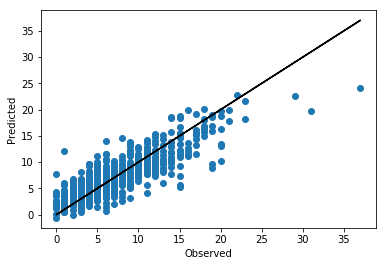

In [67]:
X_columns= ['Value']
X = final_data[X_columns]
plt.scatter(final_data['Value'],predvalues)
plt.plot(X,X,'k-')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()